## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.5,0.7,0,9,1.1,1.3]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for m in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Momentum = %.6f" % (m))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=m)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-Momentum-%s" % str(m)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0717 00:02:42.765120  8964 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 00:02:42.766120  8964 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 00:02:42.785121  8964 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 00:02:42.787121  8964 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 00:02:42.788121  8964 deprecation_wrapper.py:119] From D:\Anaconda3\li

Experiment with Momentum = 0.500000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 29s 582us/step - loss: 1.9392 - acc: 0.3068 - val_loss: 1.8008 - val_acc: 0.3662
Epoch 2/50
50000/50000 [==============================] - 28s 555us/step - loss: 1.7538 - acc: 0.3806 - val_loss: 1.7113 - val_acc: 0.3954
Epoch 3/50
50000/50000 [==============================] - 30s 594us/step - loss: 1.6686 - acc: 0.4113 - val_loss: 1.6681 - val_acc: 0.4149
Epoch 4/50
50000/50000 [==============================] - 28s 552us/step - loss: 1.6133 - acc: 0.4317 - val_loss: 1.6578 - val_acc: 0.3991
Epoch 5/50
50000/50000 [==============================] - 29s 582us/step - loss: 1.5642 - acc: 0.4471 - val_loss: 1.5514 - val_acc: 0.4495
Epoch 6/50
50000/50000 [==============================] - 29s 578us/step - loss: 1.5242 - acc: 0.4608 - val_loss: 1.6324 - val_acc: 0.4209
Epoch 7/50
50000/50000 [==============================] - 29s 583us/step - loss: 1.4992 - acc: 0.4691 - val_loss: 1.

50000/50000 [==============================] - 29s 590us/step - loss: 2.0747 - acc: 0.2566 - val_loss: 2.0206 - val_acc: 0.2726
Epoch 2/50
50000/50000 [==============================] - 28s 565us/step - loss: 1.8996 - acc: 0.3313 - val_loss: 1.8524 - val_acc: 0.3545
Epoch 3/50
50000/50000 [==============================] - 28s 568us/step - loss: 1.8269 - acc: 0.3569 - val_loss: 1.7969 - val_acc: 0.3702
Epoch 4/50
50000/50000 [==============================] - 28s 567us/step - loss: 1.7822 - acc: 0.3728 - val_loss: 1.7596 - val_acc: 0.3784
Epoch 5/50
50000/50000 [==============================] - 28s 561us/step - loss: 1.7445 - acc: 0.3852 - val_loss: 1.7695 - val_acc: 0.3719
Epoch 6/50
50000/50000 [==============================] - 28s 565us/step - loss: 1.7146 - acc: 0.3985 - val_loss: 1.7622 - val_acc: 0.3746
Epoch 7/50
50000/50000 [==============================] - 28s 567us/step - loss: 1.6829 - acc: 0.4108 - val_loss: 1.6620 - val_acc: 0.4122
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 29s 574us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 29s 581us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 28s 566us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 28s 561us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 28s 567us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 29s 573us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 29s 572us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 28s 564us/s

50000/50000 [==============================] - 29s 585us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 29s 582us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 28s 564us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 29s 580us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 29s 580us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 29s 576us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 29s 583us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 29s 580us/step - lo

50000/50000 [==============================] - 17s 347us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 17s 348us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 17s 348us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 17s 348us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 17s 349us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 17s 346us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 17s 348us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 17s 347us/step -

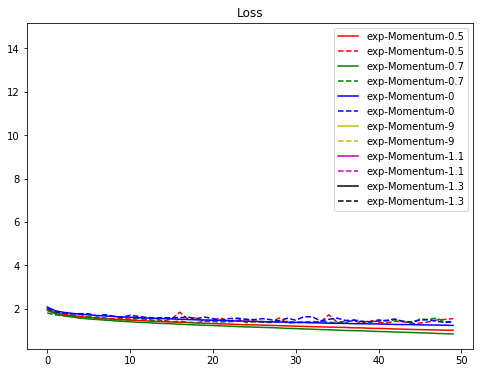

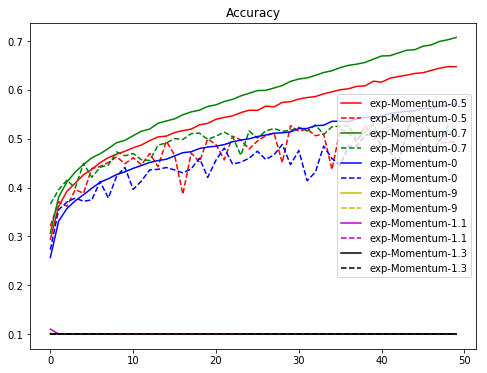

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()